# Importação das bibliotecas

In [99]:
# Importação das bibliotecas necessárias para a análise de dados
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks 

#CONFIGURAÇÕES DOS GRÁGICOS
plt.rcParams['figure.figsize'] = (20.0, 08.0)
plt.rcParams['font.family'] = "serif"
sns.color_palette("Blues", as_cmap=True)
sns.set(style="white")

# Carregamento das bases de dados

In [100]:
# Carregamento das bases de dados
base_aeronave = pd.read_csv('aeronave_2010_2020.csv', delimiter=';')
base_ocorrencia = pd.read_csv('ocorrencia_2010_2020.csv', delimiter=';')
base_ocorrencia_tipo = pd.read_csv('ocorrencia_tipo_2010_2020.csv', delimiter=';')

In [101]:
# Seleção dos campos pertinentes a análise - BASE AERONAVE
base_aeronave = base_aeronave[['codigo_ocorrencia2', 'aeronave_tipo_veiculo', 
                               'aeronave_fabricante', 'aeronave_modelo', 
                               'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_ano_fabricacao', 
                               'aeronave_pais_fabricante', 'aeronave_assentos',
                               'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino',
                               'aeronave_pmd_categoria', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 
                               'aeronave_nivel_dano', 'aeronave_fatalidades_total']]

In [102]:
# Seleção dos campos pertinentes a análise - BASE OCORRENCIA
base_ocorrencia = base_ocorrencia[['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 
                                   'codigo_ocorrencia4', 'ocorrencia_classificacao','ocorrencia_uf', 
                                   'ocorrencia_dia', 'ocorrencia_hora', 'total_aeronaves_envolvidas', 
                                   'ocorrencia_saida_pista']]

In [103]:
# Seleção dos campos pertinentes a análise - BASE OCORRENCIA TIPO
base_ocorrencia_tipo = base_ocorrencia_tipo[['codigo_ocorrencia1', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 
                                             'taxonomia_tipo_icao']]

# TRATAMENTO DOS DADOS - BASE AERONAVE

In [104]:
# Selecionando somente veiculos iguais a: aviao, helicoptero e ultraleve
base_aeronave = base_aeronave.query('aeronave_tipo_veiculo == "AVIÃO" or aeronave_tipo_veiculo == "HELICÓPTERO" or aeronave_tipo_veiculo == "ULTRALEVE"')

In [105]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_fabricante
for index, row in base_aeronave.iterrows():
    if row['aeronave_fabricante'] == '***':
        base_aeronave.at[index, 'aeronave_fabricante'] = 'INDEFINIDO'

In [106]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_motor_tipo
for index, row in base_aeronave.iterrows():
    if row['aeronave_motor_tipo'] == '***':
        base_aeronave.at[index, 'aeronave_motor_tipo'] = 'INDEFINIDO'

In [107]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_motor_quantidade
for index, row in base_aeronave.iterrows():
    if row['aeronave_motor_quantidade'] == '***':
        base_aeronave.at[index, 'aeronave_motor_quantidade'] = 'INDEFINIDO'

In [108]:
# Eliminando valores que sejam iguais a 0 - CAMPO: aeronave_ano_fabricacao
base_aeronave = base_aeronave.query('aeronave_ano_fabricacao > 0')
base_aeronave.aeronave_ano_fabricacao = base_aeronave['aeronave_ano_fabricacao'].astype(int)

In [109]:
# agrupando valores diferentes de Brasil como tipo 'OUTROS'
for index, row in base_aeronave.iterrows():
    if row['aeronave_pais_fabricante'] != 'BRASIL':
        base_aeronave.at[index, 'aeronave_pais_fabricante'] = 'OUTROS'

In [110]:
# Eliminando valores nulos: CAMPO: aeronave_assentos
base_aeronave = base_aeronave[base_aeronave['aeronave_assentos'].notnull()]

In [111]:
# Categorizando a capacidade de passageiros das aeronaves
for index, row in base_aeronave.iterrows():
    if row['aeronave_assentos'] < 20:
        base_aeronave.at[index, 'aeronave_capacidade_passageiros'] = 'BAIXA_CAPACIDADE'
    elif row['aeronave_assentos'] >= 20 and row['aeronave_assentos'] < 100:
        base_aeronave.at[index, 'aeronave_capacidade_passageiros'] = 'MEDIA_CAPACIDADE'
    elif row['aeronave_assentos'] >= 100:
        base_aeronave.at[index, 'aeronave_capacidade_passageiros'] = 'GRANDE_CAPACIDADE'

In [112]:
base_aeronave.aeronave_capacidade_passageiros.value_counts().to_frame().head()

,aeronave_capacidade_passageiros
BAIXA_CAPACIDADE,4288
GRANDE_CAPACIDADE,682
MEDIA_CAPACIDADE,366


In [113]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_registro_segmento
for index, row in base_aeronave.iterrows():
    if row['aeronave_registro_segmento'] == '***':
        base_aeronave.at[index, 'aeronave_registro_segmento'] = 'INDEFINIDO'

In [114]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_voo_origem
for index, row in base_aeronave.iterrows():
    if row['aeronave_voo_origem'] == '***':
        base_aeronave.at[index, 'aeronave_voo_origem'] = 'INDEFINIDO'

In [115]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_voo_destino
for index, row in base_aeronave.iterrows():
    if row['aeronave_voo_destino'] == '***':
        base_aeronave.at[index, 'aeronave_voo_destino'] = 'INDEFINIDO'

In [116]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_fase_operacao
for index, row in base_aeronave.iterrows():
    if row['aeronave_fase_operacao'] == '***':
        base_aeronave.at[index, 'aeronave_fase_operacao'] = 'INDETERMINADA'

In [117]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_tipo_operacao
for index, row in base_aeronave.iterrows():
    if row['aeronave_tipo_operacao'] == '***':
        base_aeronave.at[index, 'aeronave_tipo_operacao'] = 'INDEFINIDO'

In [118]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: aeronave_nivel_dano
for index, row in base_aeronave.iterrows():
    if row['aeronave_nivel_dano'] == '***':
        base_aeronave.at[index, 'aeronave_nivel_dano'] = 'INDEFINIDO'

# TRATAMENTO DOS DADOS - BASE OCORRENCIA

In [119]:
# Atribuindo o valor 'INDEFINIDO' onde os valores são iguais a '***' - CAMPO: ocorrencia_uf
for index, row in base_ocorrencia.iterrows():
    if row['ocorrencia_uf'] == '***':
        base_ocorrencia.at[index, 'ocorrencia_uf'] = 'INDEFINIDO'

In [120]:
# Eliminando valores nulos CAMPO: ocorrencia_dia
base_ocorrencia = base_ocorrencia[base_ocorrencia['ocorrencia_dia'].notnull()]

In [121]:
# Extraindo o ano da data da ocorrência CAMPO: ocorrencia_dia
base_ocorrencia['ocorrencia_dia'] = pd.to_datetime(base_ocorrencia['ocorrencia_dia'], format='%d/%m/%Y')
base_ocorrencia['ocorrencia_dia'] = base_ocorrencia.ocorrencia_dia.dt.year

In [122]:
# Criando a base acidentes_ocorridos_por_ano a partir da quantidade de acidentes ocorridos no ano e o ano
acidentes_ocorridos_por_ano = pd.DataFrame({'quantidade_de_acidentes_ocorridos':[552, 576, 647, 654, 567, 471, 403, 432, 444, 496, 510]},
                                           index=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [123]:
# Eliminando valores nulos CAMPO: ocorrencia_hora
base_ocorrencia = base_ocorrencia[base_ocorrencia['ocorrencia_hora'].notnull()]

In [124]:
# Extraindo a hora do horário da ocorrência CAMPO: ocorrencia_hora
base_ocorrencia['ocorrencia_hora'] = pd.to_datetime(base_ocorrencia['ocorrencia_hora'], format='%H:%M:%S')
base_ocorrencia['ocorrencia_hora'] = base_ocorrencia.ocorrencia_hora.dt.hour

In [125]:
# Classificando em período do dia de acordo com o horário da ocorrência do acidente
for index, row in base_ocorrencia.iterrows():
    if row['ocorrencia_hora'] >= 0 and row['ocorrencia_hora'] <= 6:
        base_ocorrencia.at[index, 'periodo_ocorrencia'] = 'MADRUGADA'
    elif row['ocorrencia_hora'] > 6 and row['ocorrencia_hora'] < 12:
        base_ocorrencia.at[index, 'periodo_ocorrencia'] = 'MANHA'
    elif row['ocorrencia_hora'] >= 12 and row['ocorrencia_hora'] < 18:
        base_ocorrencia.at[index, 'periodo_ocorrencia'] = 'TARDE'
    elif row['ocorrencia_hora'] >= 18 and row['ocorrencia_hora'] <= 23:
        base_ocorrencia.at[index, 'periodo_ocorrencia'] = 'NOITE'

# TRATAMENTO DOS DADOS - BASE OCORRENCIA TIPO

In [126]:
# Join entre as bases base_ocorrencia e base_aeronave, gerando a base base_completa
base_completa = pd.merge(base_ocorrencia, base_aeronave, on='codigo_ocorrencia2', how='inner')
base_completa = pd.merge(base_completa, base_ocorrencia_tipo, on='codigo_ocorrencia1', how='inner')

# Análise Exploratória

O que está relacionado a ocorrências com fatalidade ?

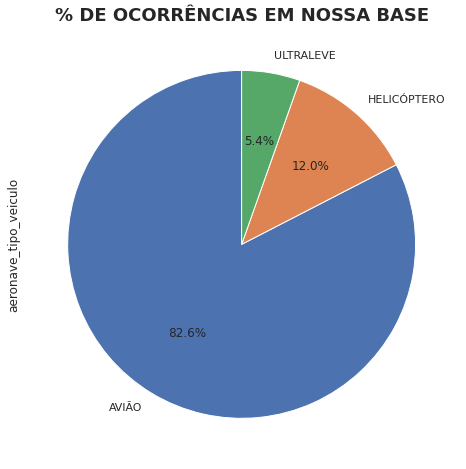

In [127]:
base_aeronave["aeronave_tipo_veiculo"].value_counts().plot.pie(figsize=(20,8), 
                                         labels=["AVIÃO", "HELICÓPTERO", "ULTRALEVE"],
                                         autopct='%1.1f%%',
                                         startangle=90).set_title("% DE OCORRÊNCIAS EM NOSSA BASE", weight='bold', size=18);

In [128]:
# Em nossa base de dados podemos ver que a maioria das ocorrências são referentes a aviões:

### Tipo Veiculo X Fatalidades totais

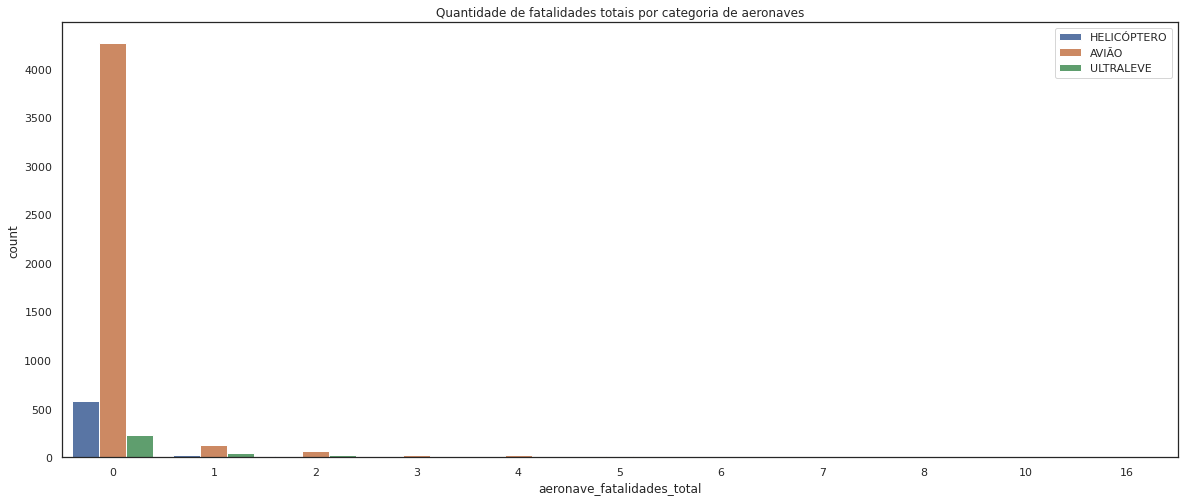

In [129]:
sns.countplot(hue=base_completa.aeronave_tipo_veiculo, x=base_completa.aeronave_fatalidades_total)
plt.legend(loc='upper right')
plt.title('Quantidade de fatalidades totais por categoria de aeronaves');

### Fabricante x Fatalidades totais

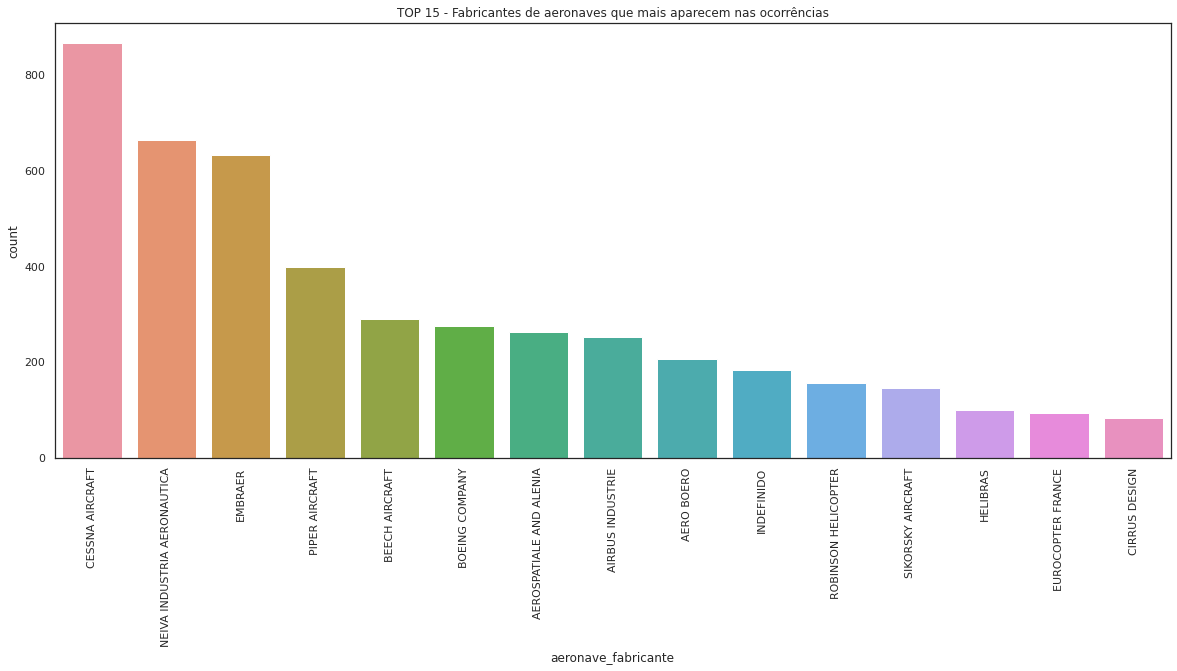

In [130]:
sns.countplot(x=base_completa.aeronave_fabricante, order=base_completa.aeronave_fabricante.value_counts().iloc[:15].index), xticks(rotation=90)
plt.title('TOP 15 - Fabricantes de aeronaves que mais aparecem nas ocorrências');

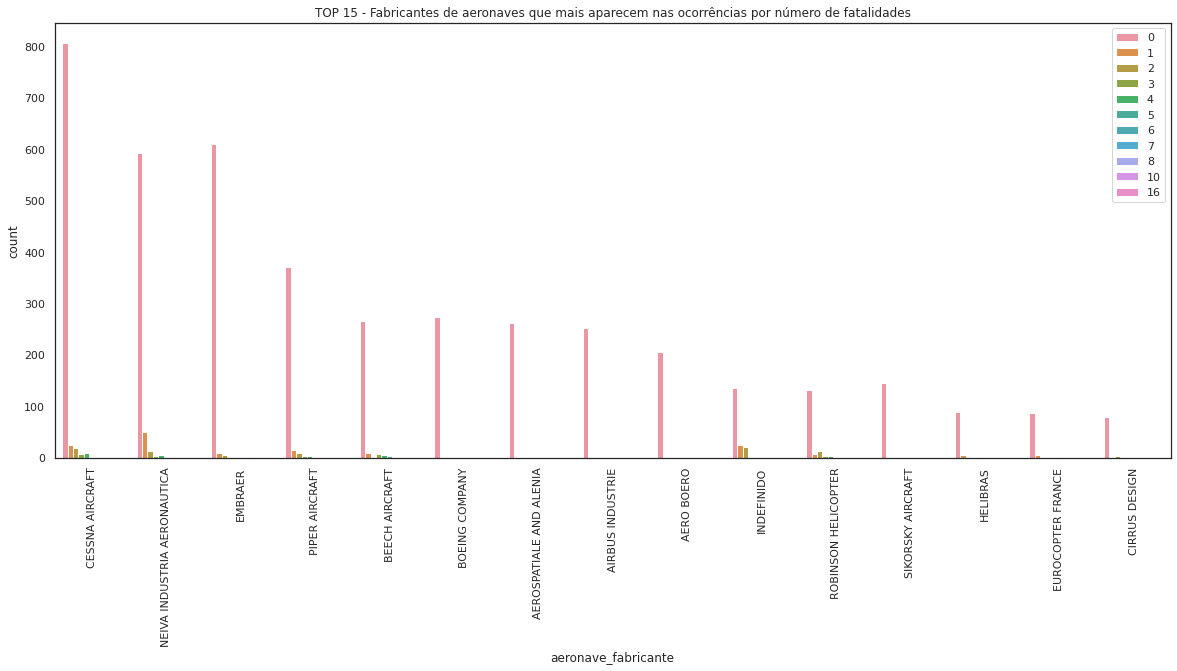

In [131]:
sns.countplot(x=base_completa.aeronave_fabricante, hue=base_completa.aeronave_fatalidades_total, 
              order=base_completa.aeronave_fabricante.value_counts().iloc[:15].index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('TOP 15 - Fabricantes de aeronaves que mais aparecem nas ocorrências por número de fatalidades');

In [132]:
# Embora a Fabricante NEIVA INDUSTRIA AERONAUTICA tenha quase 200 ocorrências a menos que a CESSNA AIRCRAFT, 
# podemos perceber que o número de fatalidades envolvendo ao menos uma vida é mais que o dobro da 1a colocada.  

In [133]:
# Vejamos agora as fabricantes, considerando somente os acidentes com a fatalidade de ao menos uma pessoa

In [134]:
base_fatalidade_maior_que_zero = base_completa.query('aeronave_fatalidades_total > 0')

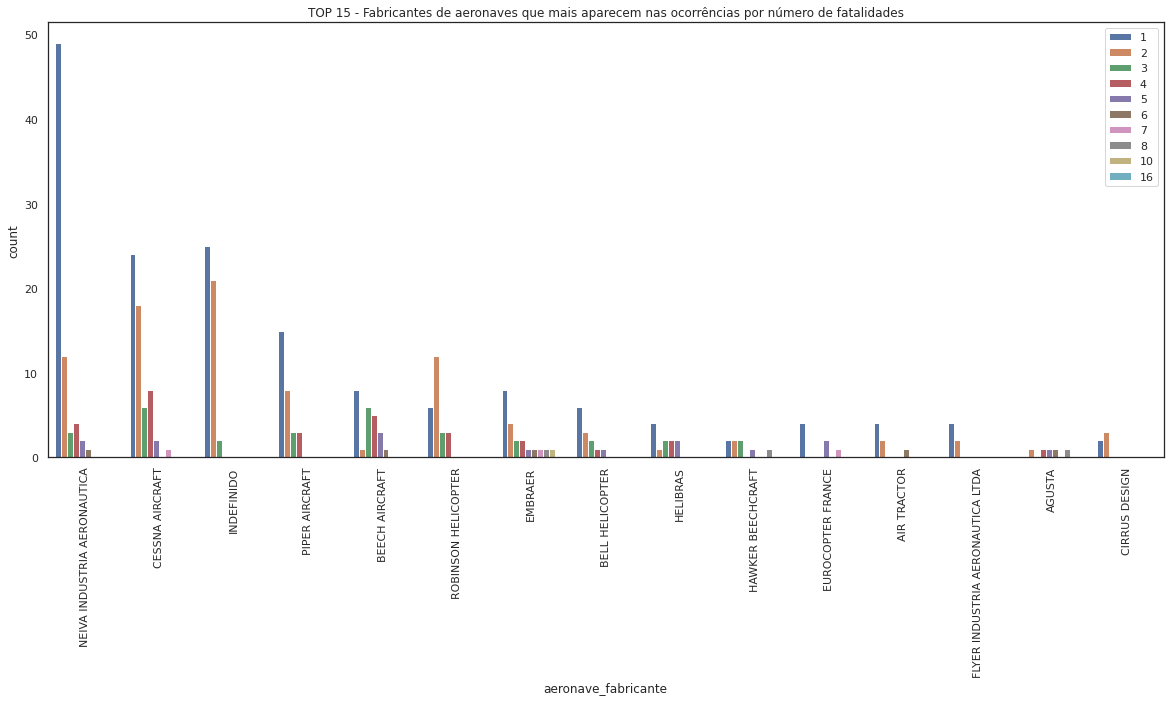

In [135]:
sns.countplot(x=base_fatalidade_maior_que_zero.aeronave_fabricante, hue=base_fatalidade_maior_que_zero.aeronave_fatalidades_total, 
              order=base_fatalidade_maior_que_zero.aeronave_fabricante.value_counts().iloc[:15].index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('TOP 15 - Fabricantes de aeronaves que mais aparecem nas ocorrências por número de fatalidades');

In [136]:
# Como suspeitamos, apesar da fabricante NEIVA INDUSTRIA AERONAUTICA não ser a líder em ocorrências, ela é lider em acidentes fatais envolvendo uma vida.
# Ainda assim, se desconsiderarmos os registros indefinidos, a CESSNA AIRCRAFT lidera os acidentes fatais entre duas e quatro vidas.

### Quantidade de Motores x Fatalidades totais

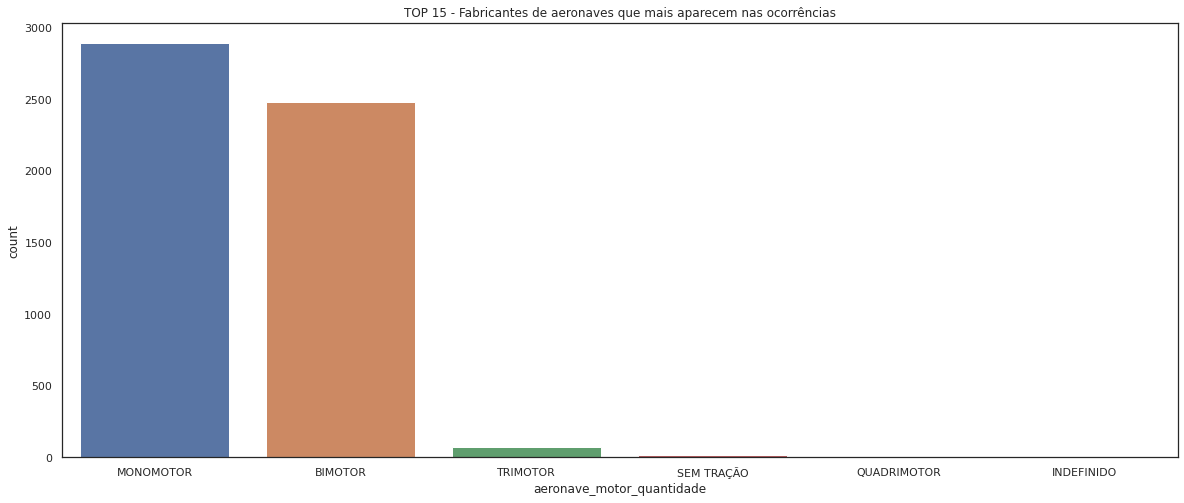

In [137]:
sns.countplot(x=base_completa.aeronave_motor_quantidade, order=base_completa.aeronave_motor_quantidade.value_counts().index)#, xticks(rotation=90)
plt.title('TOP 15 - Fabricantes de aeronaves que mais aparecem nas ocorrências');

In [138]:
# Podemos observar que a nossa base se resume basicamente a aeronaves com um e dois motores apenas, juntas totalizando 98% dos registros.

#MONOMOTOR    53%
#BIMOTOR      45%
#TRIMOTOR     1,3%
#SEM TRAÇÃO   menor que 1%
#QUADRIMOTOR  menor que 1%
#INDEFINIDO   menor que 1%

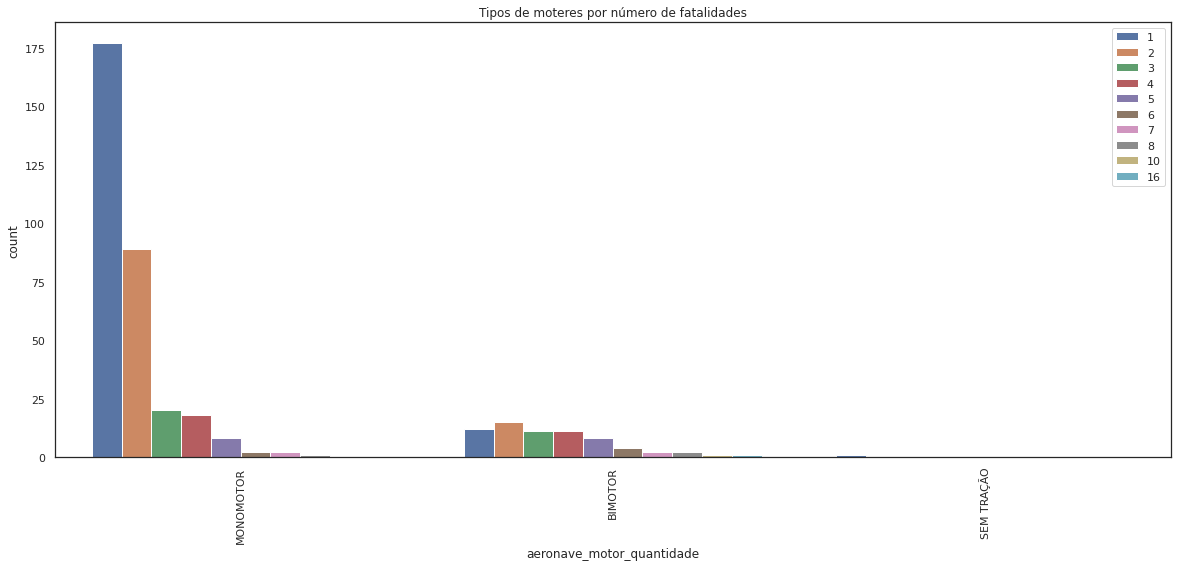

In [139]:
sns.countplot(x=base_fatalidade_maior_que_zero.aeronave_motor_quantidade, hue=base_fatalidade_maior_que_zero.aeronave_fatalidades_total, 
              order=base_fatalidade_maior_que_zero.aeronave_motor_quantidade.value_counts().index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Tipos de moteres por número de fatalidades');

In [140]:
# Três coisas podemos observar aqui:
# 1a - Não constam acidentes fatais em nossa base envolvendo aeronaves trimotor e quadrimotor.
# 2a - No caso de aviões bimotores, o número de fatalidades com mais de duas vidas é superior ao número de fatalidades com uma vida apenas.
# 3a - A quantidade de vidas perdidas nos acidentes com aviões bimotores é indiscutivelmente menor, considerando o número total de ocorrências com fatalidades ou não.

# Isso pode ser explicado talvez por a aeronave não ficar desassistida na falha de um motor, apesar de não ser a condição ideal de voo, ainda há um motor para ser utilizado.

### Capacidade de passageiros da aeronave x Fatalidades totais

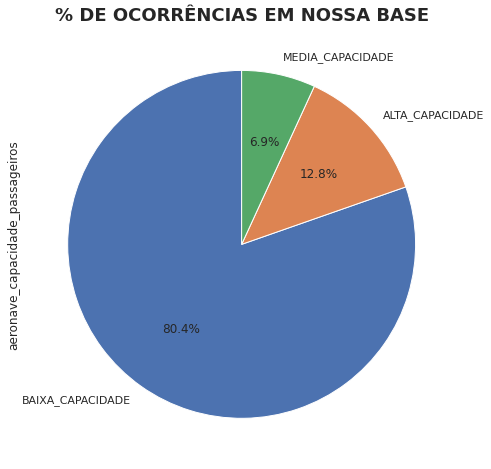

In [141]:
base_aeronave["aeronave_capacidade_passageiros"].value_counts().plot.pie(figsize=(20,8), 
                                                 labels=["BAIXA_CAPACIDADE", "ALTA_CAPACIDADE", "MEDIA_CAPACIDADE"],
                                                 autopct='%1.1f%%',
                                                 startangle=90).set_title("% DE OCORRÊNCIAS EM NOSSA BASE", weight='bold', size=18);

In [142]:
# A nossa base é majoritariamente composta por aeronaves que comportam até 19 passageiros
# Seguido de aeronaves de grande capacidade de passageiros (100 passageiros ou mais)
# E por último, aeronaves com média capacidade (20 a 99 passageiros) 

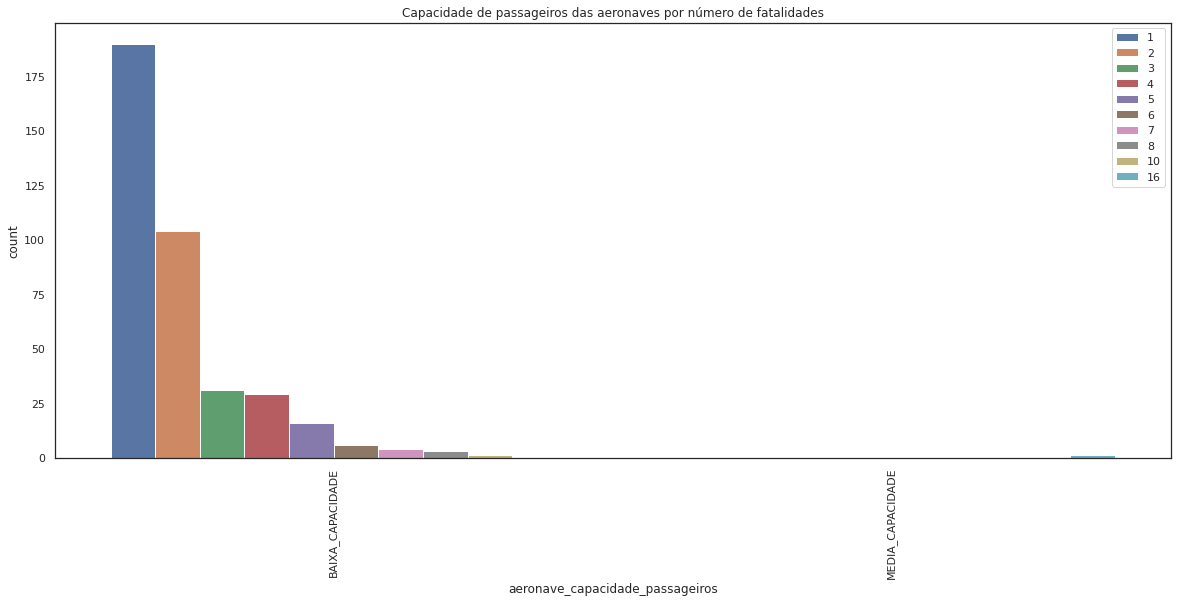

In [143]:
sns.countplot(x=base_fatalidade_maior_que_zero.aeronave_capacidade_passageiros, hue=base_fatalidade_maior_que_zero.aeronave_fatalidades_total, 
              order=base_fatalidade_maior_que_zero.aeronave_capacidade_passageiros.value_counts().index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Capacidade de passageiros das aeronaves por número de fatalidades');

In [144]:
# Podemos ver que as aeronaves com grandes capacidades de passageiros felizmente não aparecem, quando olhamos somente para incidentes onde houve a perda de uma vida ao menos.
# Aeronaves de média capacidade aparecem somente uma vez, mas com um acidente com 16 vidas perdidas.

# O fato de aeronaves de grande capacidade não aparecerem, talvez se de ao fato de serem grandes e tecnológicos aviões, que seguem rigorosas normas e exigências de segurança para poderem operar transportando uma grande quantidade de passageiros.

### Nível de dano da aeronave x Fatalidades totais

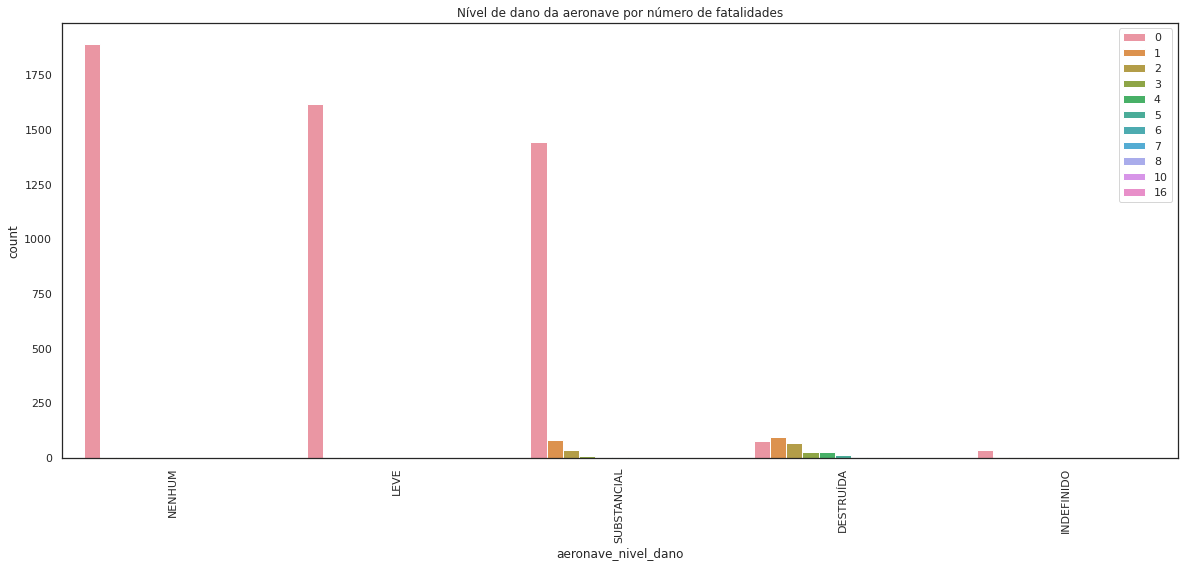

In [145]:
sns.countplot(x=base_completa.aeronave_nivel_dano, hue=base_completa.aeronave_fatalidades_total, 
              order=base_completa.aeronave_nivel_dano.value_counts().index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Nível de dano da aeronave por número de fatalidades');

In [146]:
# Podemos ver que pequenos incidentes com as aeronaves aparentemente não causam fatalidades.

In [147]:
# Vamos olhar agora somente para os incidentes com fatalidades.

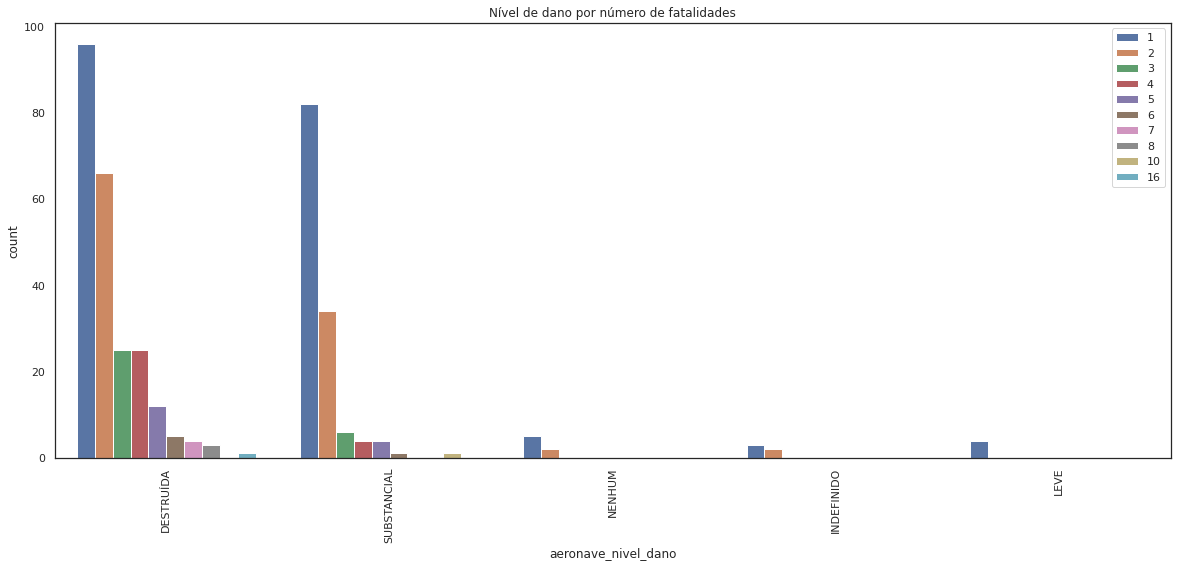

In [148]:
sns.countplot(x=base_fatalidade_maior_que_zero.aeronave_nivel_dano, hue=base_fatalidade_maior_que_zero.aeronave_fatalidades_total, 
              order=base_fatalidade_maior_que_zero.aeronave_nivel_dano.value_counts().index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Nível de dano por número de fatalidades');

In [149]:
# Podemos ver que quando ocorrem danos substanciais, também há uma quantidade relevante de fatalidades, menor que quando a aeronave é totalmente destruída, 
# mas ainda sim considerável.

# Vemos também casos curiosos, onde não houveram danos a aeronave, mas houveram fatalidades. Pode ser um caso de erro nos dados, ou algo neste sentido.

## Gravidade das ocorrências 

In [150]:
#Segundo o site http://imedita.com.br/acidente-incidente-diferenca/, eis a diferença entre acidente e incidente: 
#a grande diferença entre acidente e incidente é o dano. No incidente o fato inesperado e potencialmente perigoso acontece, 
#mas graças a alguma circunstância favorável ele não causa danos a ninguém. Já no acidente o dano acontece e há perdas significativas. 

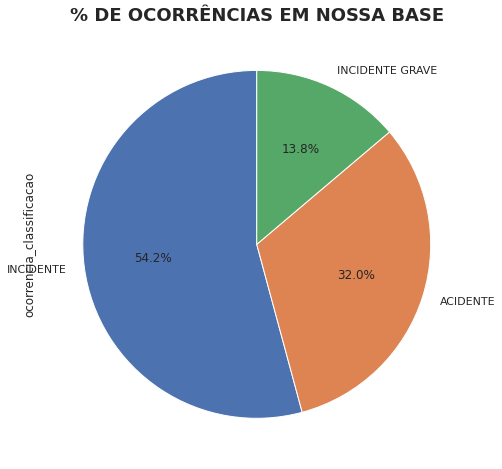

In [151]:
base_completa["ocorrencia_classificacao"].value_counts().plot.pie(figsize=(20,8), 
                                                 labels=["INCIDENTE", "ACIDENTE", "INCIDENTE GRAVE"],
                                                 autopct='%1.1f%%',
                                                 startangle=90).set_title("% DE OCORRÊNCIAS EM NOSSA BASE", weight='bold', size=18);

In [152]:
#Incidentes contemplam a maioria das ocorrências, com 54,2% do total, seguido de Acidentes, com 32% e Incidente Graves, com 13,8%. 
#Vamos ver a classificação das ocorrências, considerando o número de aviões envolvidos. 

### Número de aeronaves envolvidas x Classificação da ocorrência

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


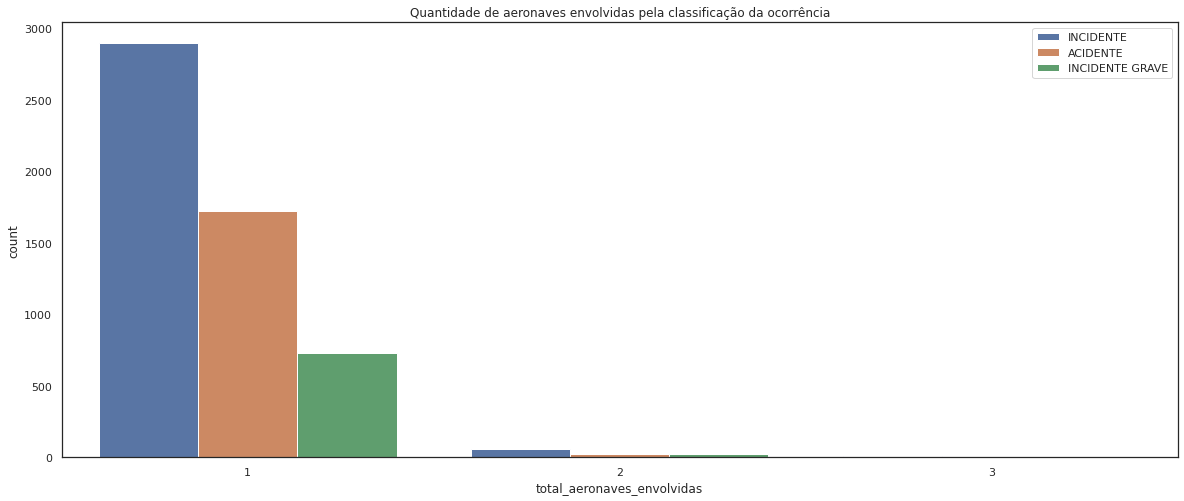

In [153]:
sns.countplot(base_completa.total_aeronaves_envolvidas, hue=base_completa.ocorrencia_classificacao)
plt.legend(loc='upper right')
plt.title('Quantidade de aeronaves envolvidas pela classificação da ocorrência');

In [154]:
# Felizmente incidentes graves são menos frequentes dentre as ocorrências. E as ocorrências envolvendo mais de uma aeronave em sua maioria não são graves. 

### Tipo de veículo da aeronave x Classificação da ocorrência 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


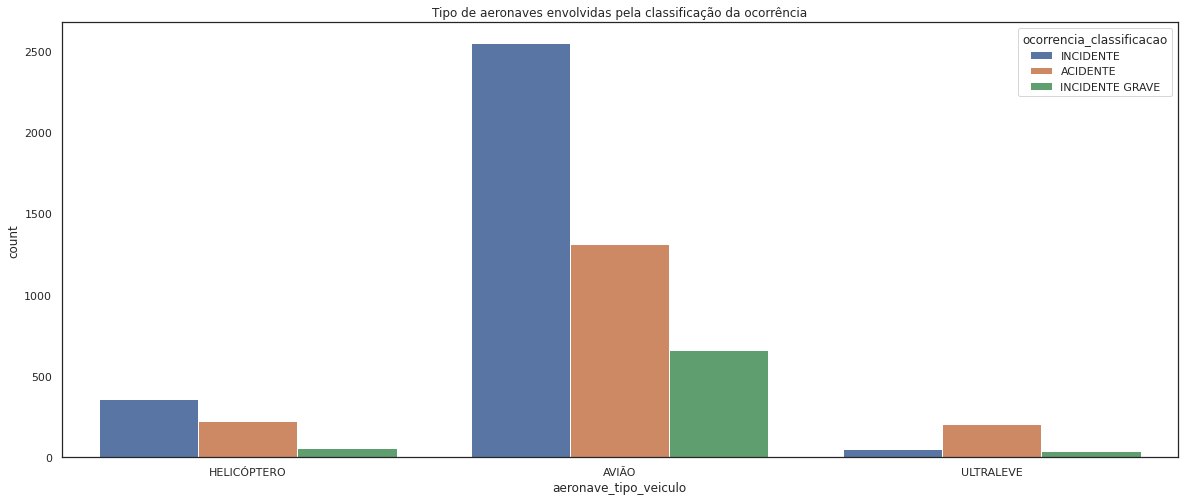

In [155]:
sns.countplot(base_completa.aeronave_tipo_veiculo, hue=base_completa.ocorrencia_classificacao)
plt.title('Tipo de aeronaves envolvidas pela classificação da ocorrência');

In [156]:
#O único tipo de aeronave que não segue a tendência da base completa é o ultraleve, com mais acidentes que Incidentes e Incidentes Graves. 

### Ano de fabricação da aeronave x Classificação da ocorrência 

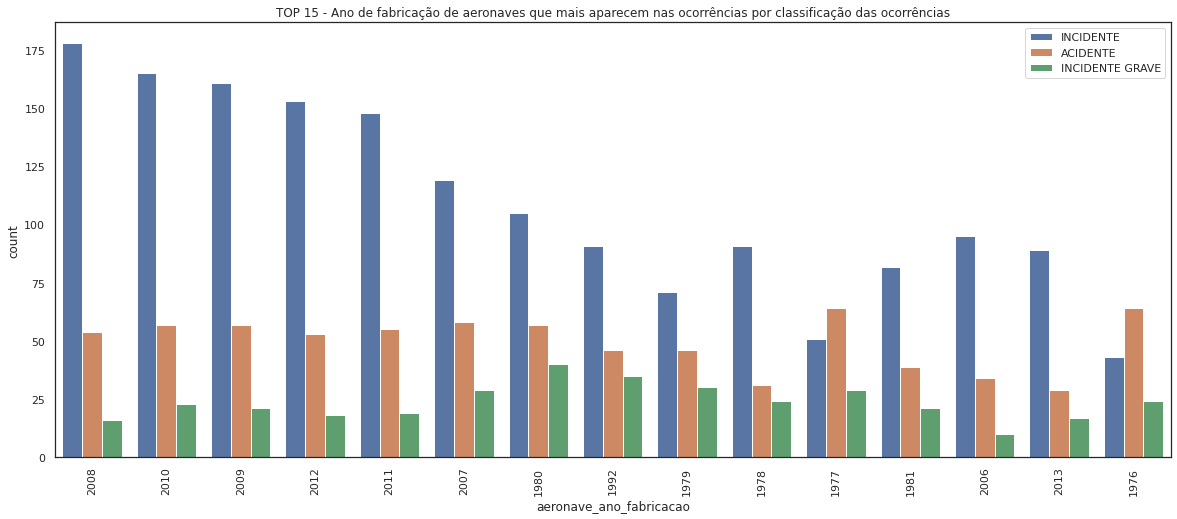

In [157]:
sns.countplot(x=base_completa.aeronave_ano_fabricacao, hue=base_completa.ocorrencia_classificacao, 
              order=base_completa.aeronave_ano_fabricacao.value_counts().iloc[:15].index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('TOP 15 - Ano de fabricação de aeronaves que mais aparecem nas ocorrências por classificação das ocorrências');

In [158]:
#Não conseguimos apontar uma relação clara do ano de fabricação da aeronave com o tipo de ocorrências. 
#A princípio pensamos que o fato de as aeronaves serem mais antigas, pudesse ocasionar maiores problemas devido a desgaste, manutenção e outros aspectos referentes ao tempo. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


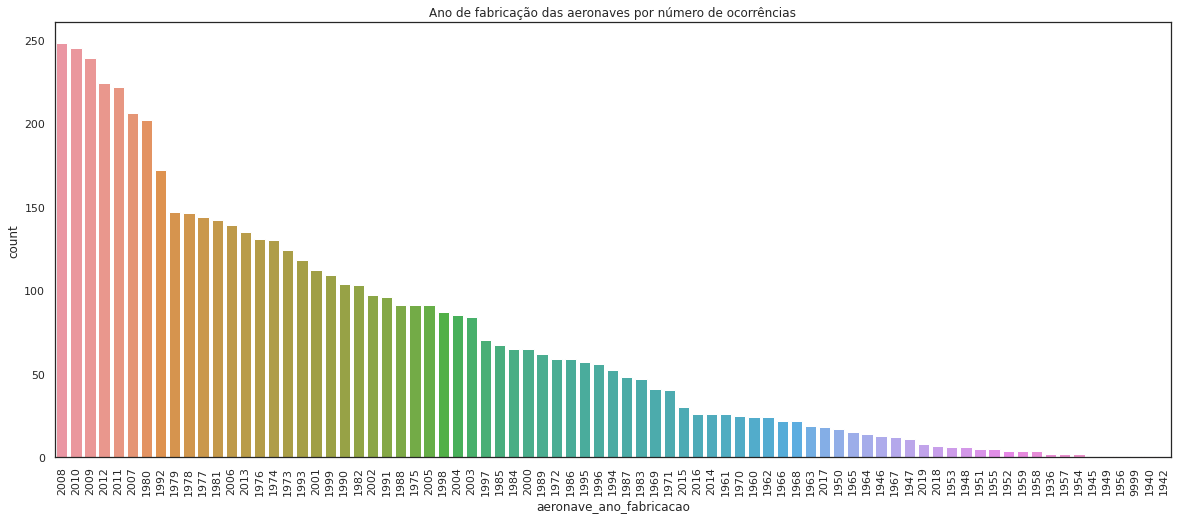

In [159]:
sns.countplot(base_completa.aeronave_ano_fabricacao,
             order=base_completa.aeronave_ano_fabricacao.value_counts().index),xticks(rotation=90)
plt.title('Ano de fabricação das aeronaves por número de ocorrências');

In [160]:
# Podemos verificar que, as maiores quantidades de ocorrências acontecem com as aeronaves com ano de fabricação entre 2007 e 2011. 
# Ao contrário do que se poderia pensar, os aviões mais novos são os que mais podem ocasionar ocorrências. 

### Tipo da ocorrência x Classificação da ocorrência 

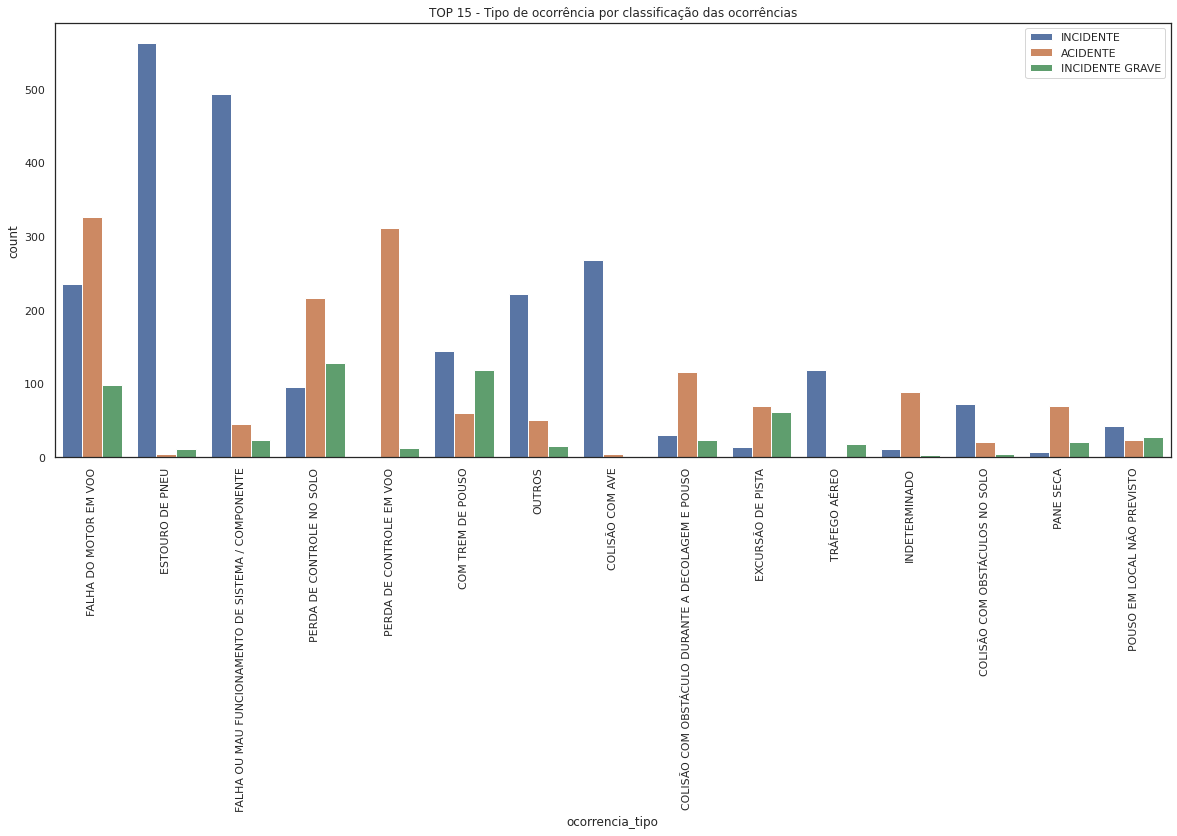

In [161]:
sns.countplot(x=base_completa.ocorrencia_tipo, hue=base_completa.ocorrencia_classificacao, 
              order=base_completa.ocorrencia_tipo.value_counts().iloc[:15].index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('TOP 15 - Tipo de ocorrência por classificação das ocorrências');

In [162]:
#Segundo o nosso gráfico, os maiores causadores de incidentes são: estouro de pneu, falha ou mau funcionamento de sistema/componente e colisão com aves. 
#Maiores causadores de acidentes: falha do motor em voo e perda de controle em voo estão praticamente empatados e em terceiro, perda de controle em solo. 
#Maiores causadores de incidentes graves: perda de controle em solo, problemas com o trem de pouso e falha do motor em voo. 
#Vamos olhar com mais detalhes as causas de incidentes graves: 

No handles with labels found to put in legend.


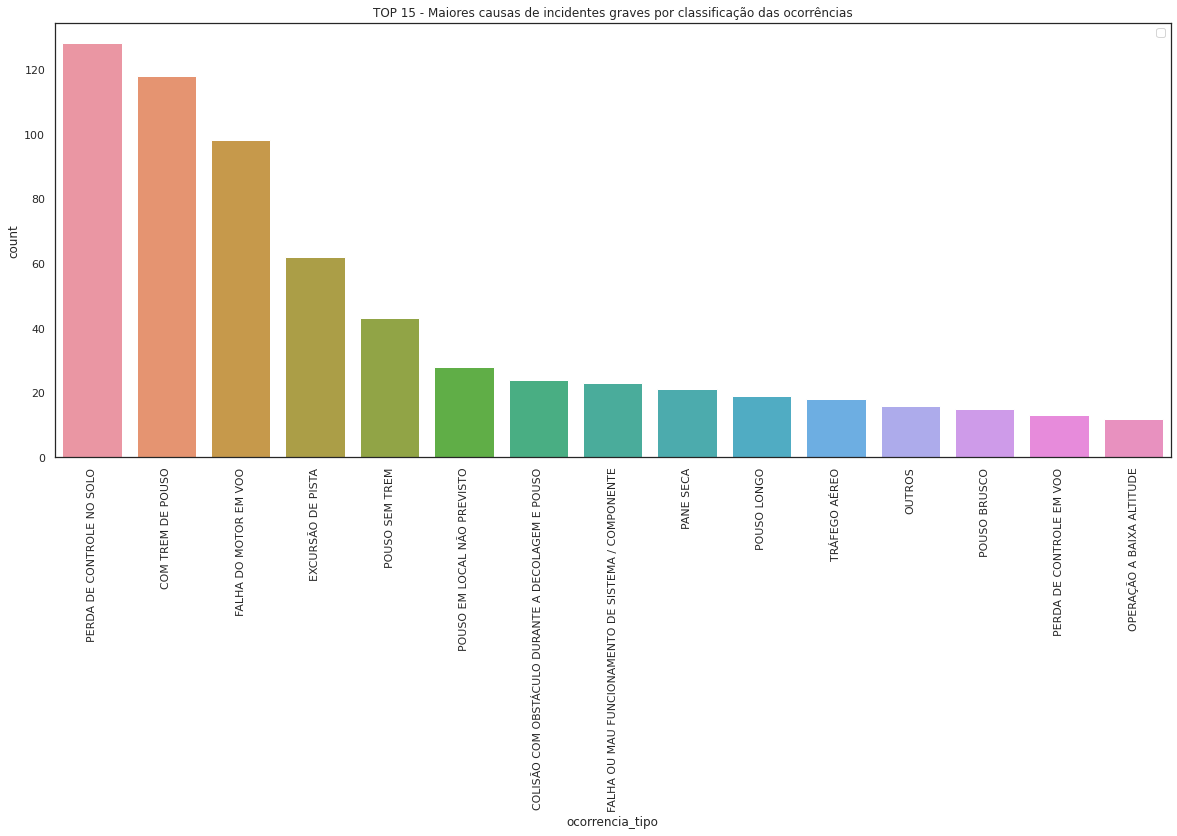

In [163]:
base_incidentes_graves = base_completa.query('ocorrencia_classificacao == "INCIDENTE GRAVE"')
sns.countplot(x=base_incidentes_graves.ocorrencia_tipo,
             order=base_incidentes_graves.ocorrencia_tipo.value_counts().iloc[:15].index),xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('TOP 15 - Maiores causas de incidentes graves por classificação das ocorrências');

In [164]:
#Podemos observar que entre as 7 maiores causas de incidentes graves, 6 estão relacionadas a pouso e decolagem! 
#Considerando estas informações, vejamos se a má visibilidade da pista ou algum outro fator envolvendo uma menor claridade do dia pode contribuir com este cenário: 

### Período do dia da ocorrência x Classificação da ocorrência

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


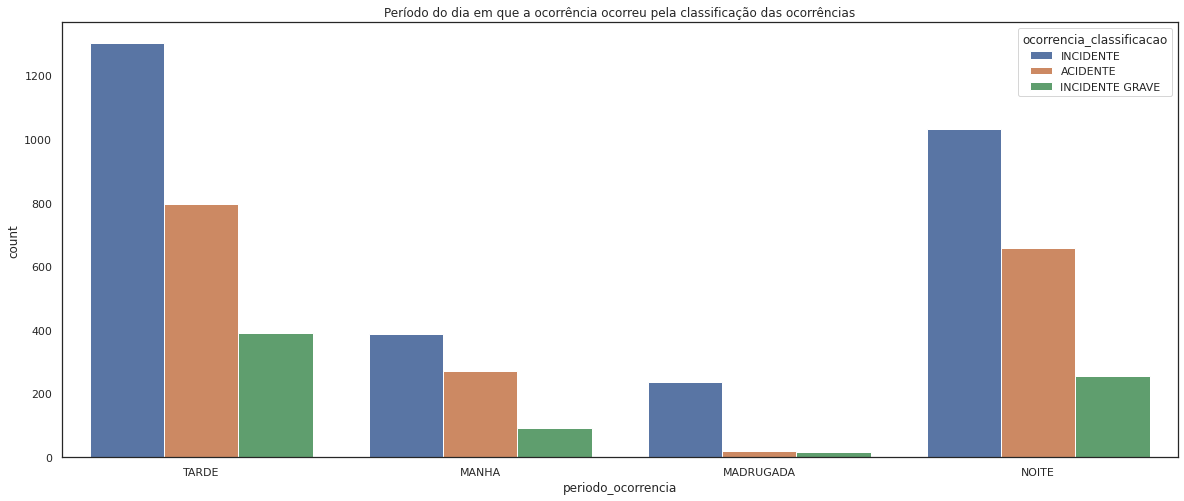

In [165]:
sns.countplot(base_completa.periodo_ocorrencia, hue=base_completa.ocorrencia_classificacao)
plt.title('Período do dia em que a ocorrência ocorreu pela classificação das ocorrências');

In [166]:
# Apesar dos números das ocorrências serem altos no período da noite, não podemos afirmar que ele influencie na incidência das ocorrências,
# considerando que o período em que há mais ocorrências é durante a tarde. 

### Número de fatalidades x Classificação da ocorrência 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


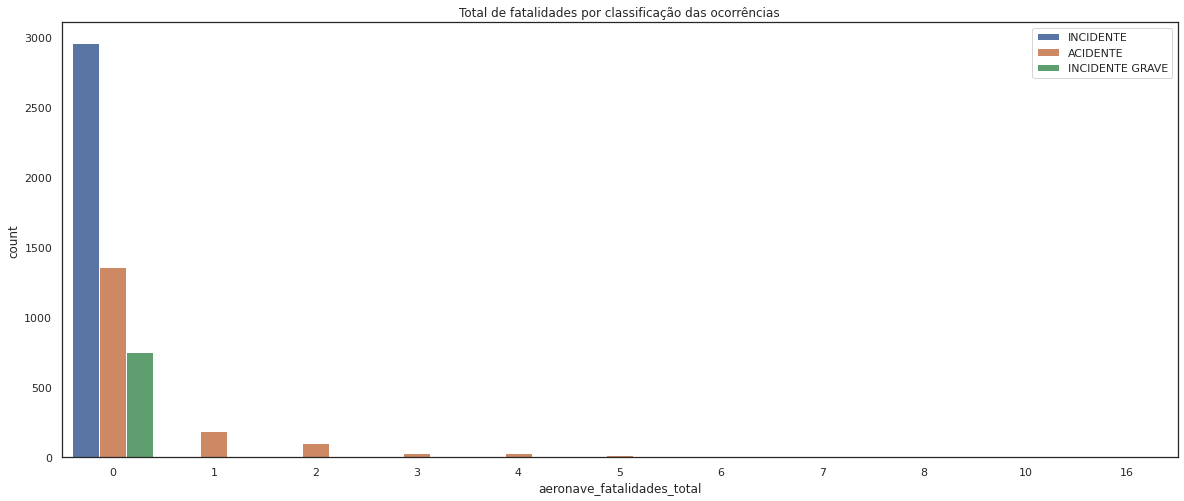

In [167]:
sns.countplot(base_completa.aeronave_fatalidades_total, hue=base_completa.ocorrencia_classificacao)
plt.legend(loc='upper right')
plt.title('Total de fatalidades por classificação das ocorrências');

In [168]:
# Podemos ver que os grandes causadores de fatalidades são os acidentes. 

### Quantidade de acidentes ocorridos no ano

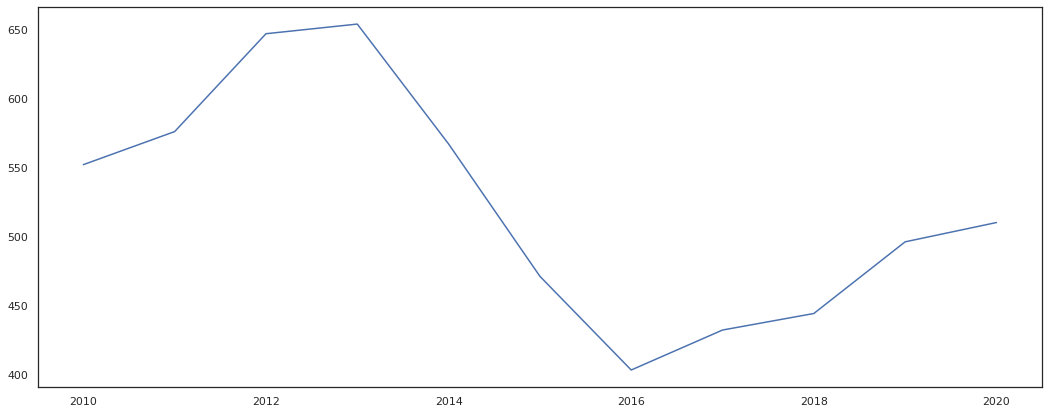

In [169]:
plt.figure(figsize=(18, 7))
acidentes_ocorridos_por_ano.quantidade_de_acidentes_ocorridos.plot.line();

In [373]:
#Podemos ver que a partir de 2012 ocorreu uma forte queda nas ocorrências de incidentes/acidentes de aeronaves no Brasil, atingindo o seu menor valor em 2016. 
#Em 2017 essas ocorrências voltaram a crescer, mas ainda assim, abaixo dos valores registrados no início da década passada. 
#Novas medidas de segurança, protocolos, procedimentos/recomendações podem ter sido implementados para que estes números tenham diminuído nos últimos anos. 